# **Online Retail Customer Churn Prediction Analysis**

## **1. Importing Libararies**

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import tensorflow
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

## **2. Reading Data and Header View**

In [118]:
df = pd.read_csv('Churn_Modelling.csv')
pd.set_option('display.max_columns', None)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


## **3. Shape of Data**

In [119]:
df.shape

(10002, 14)

## **4. Info about Data**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


## **5. Null Values Distribution**

In [121]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

## **6. Description of Data**

In [122]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002,10002.000000,10001,10002,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5001.499600,1.569093e+07,NaN,650.555089,NaN,NaN,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,NaN,96.661615,NaN,NaN,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000


## **7. Value Counts of Target Column**

In [123]:
df['Exited'].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

## **8. Train Test Split**

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['RowNumber','CustomerId', 'Exited', 'Surname']),
                                                    df['Exited'],
                                                    test_size=0.2,
                                                    random_state=42)

## **9. Splitting Numerical and Categorical Columns Indices**

In [127]:
numerical_columns = [0, 3, 4, 5, 6, 7, 8, 9]
categorical_columns = [1, 2]

## **10. Creating Pipelines**

In [128]:
handle_numerical = Pipeline(steps=[
    ('impute', KNNImputer(n_neighbors=5)),
    ('scale', MinMaxScaler())
])

In [129]:
handle_categorical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

## **11. Combining Pipelines in Column Transformer**

In [130]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('categorical', handle_categorical, categorical_columns)
], remainder='passthrough')

## **12. Modeling**

In [131]:
model = Sequential()

model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [132]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

## **13. Transformed to Preprocessed Data**

In [134]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.fit_transform(X_test)

## **14. Training the Model**

In [135]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100


128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7987 - loss: 0.6060 - val_accuracy: 0.8014 - val_loss: 0.5117
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7933 - loss: 0.5147 - val_accuracy: 0.8014 - val_loss: 0.4991
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7948 - loss: 0.5076 - val_accuracy: 0.8014 - val_loss: 0.4982
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7988 - loss: 0.5017 - val_accuracy: 0.8014 - val_loss: 0.4977
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8036 - loss: 0.4947 - val_accuracy: 0.8014 - val_loss: 0.4972
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.5164 - val_accuracy: 0.8014 - val_loss: 0.4958
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8063 - loss: 0.4888 - val_accuracy: 0.8014 - val_loss: 0.4945
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7965 - loss: 0.4998 - val_accuracy: 0.8014

## **15. Prediction of Test Data**

In [136]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [137]:
y_pred = y_pred.argmax(axis=-1)

## **16. Classification Report**

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1599
           1       0.00      0.00      0.00       402

    accuracy                           0.80      2001
   macro avg       0.40      0.50      0.44      2001
weighted avg       0.64      0.80      0.71      2001



## **17. Plotting between loss and val_loss**

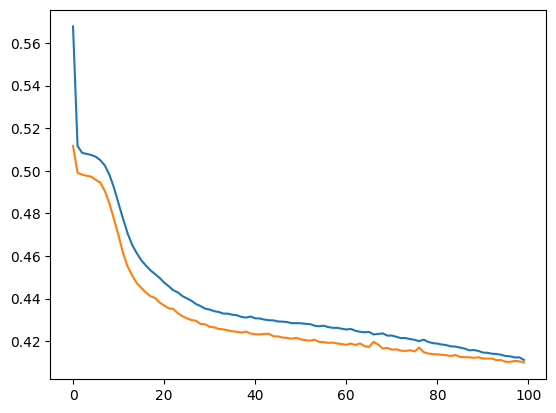

In [139]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## **18. Plotting between accuracy and val_accuracy**

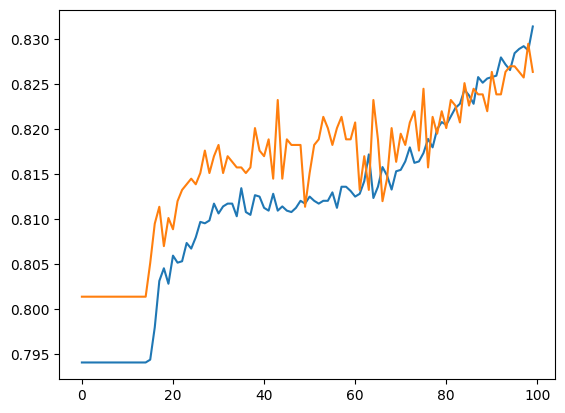

In [140]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()